<a href="https://colab.research.google.com/github/Khachapurilover/AI_PSU/blob/main/3/%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes  # подключаем датасет из sklearn
from sklearn.model_selection import train_test_split
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from collections import Counter
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet


In [ ]:
def Reg_Models_Evaluation_Metrics (model, X_train, y_train, X_test, y_test, y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    r2 = model.score(X_test, y_test)
    n = X_test.shape[0]
    p = X_test.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\n  R2: {round(R2,4)}\n Adjusted R2: {round(adjusted_r2, 4)}\n Cross Validated R2: {round(cv_score.mean(),4)}')
    return R2, adjusted_r2, CV_R2, RMSE

In [ ]:
nfeat = 20
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=nfeat, noise=1, random_state=54)

In [ ]:
xy = np.column_stack((X,y))

In [ ]:
cols = 'Борщ, Рассольник, Овощной, Бульон, Чечевичный, Грибной, Томатный, Минестроне, Зелёный, Луковый, Морепродуктовый, Фрикадельковый, Окрошка, Лапша, Кудрявый, Тыквенный, Брокколинский, Киноаский, Гороховый, Креветочный, Картофельный'
words = cols.split(', ')
rand_cols = []
i = 0
for i, v in enumerate(words):
  rand_cols.append(words[i])

In [ ]:
df = pd.DataFrame(xy, columns=rand_cols)
df.head()

,Борщ,Рассольник,Овощной,Бульон,Чечевичный,Грибной,Томатный,Минестроне,Зелёный,Луковый,...,Фрикадельковый,Окрошка,Лапша,Кудрявый,Тыквенный,Брокколинский,Киноаский,Гороховый,Креветочный,Картофельный
0,-1.563563,1.155013,0.609762,-0.406069,1.341197,0.624562,-0.473605,-0.231678,0.370932,0.533116,...,-0.094375,-1.633782,-0.597387,-1.461006,0.145204,-0.894691,-0.122690,-0.450690,-0.136219,-88.901081
1,-0.609169,-0.597139,0.884856,-0.565431,1.475390,0.447642,0.557892,0.443072,-0.441873,-0.619401,...,-1.779212,0.573186,-0.396828,0.333261,0.736158,1.204950,-0.808763,0.898591,0.369358,-74.723599
2,0.629381,0.161343,-0.500396,1.183273,0.428968,-0.533119,-1.194485,1.327805,-0.578398,1.531349,...,0.561670,-0.015007,1.106630,-0.210311,-1.273927,0.953817,-2.078956,-0.427122,1.465740,181.598011
3,-1.147587,0.405081,0.043073,0.799255,2.961020,0.708961,1.674710,0.170535,1.797257,1.744816,...,-0.971617,-1.554591,-0.868010,-0.031268,-1.236956,0.253440,0.235757,-0.542005,1.405318,129.927733
4,-2.128812,0.799519,-0.263967,-0.876611,-1.619441,0.503700,1.524895,0.114512,-0.293133,0.564088,...,1.393729,-0.123296,-0.862490,-0.697303,-0.211140,1.675519,0.540046,-0.410766,-1.387205,-41.571988


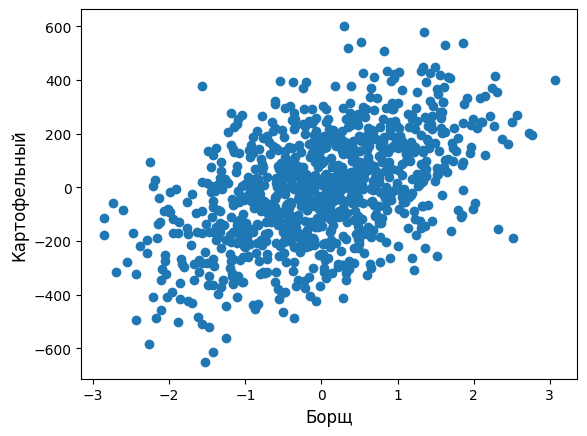

In [ ]:
plt.scatter(df['Борщ'], df['Картофельный'])
plt.ylabel('Картофельный', size=12)
plt.xlabel('Борщ', size=12)
plt.show()

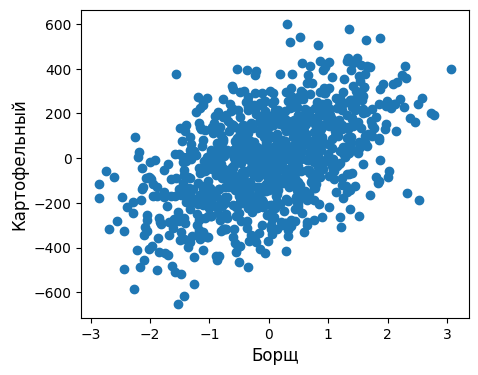

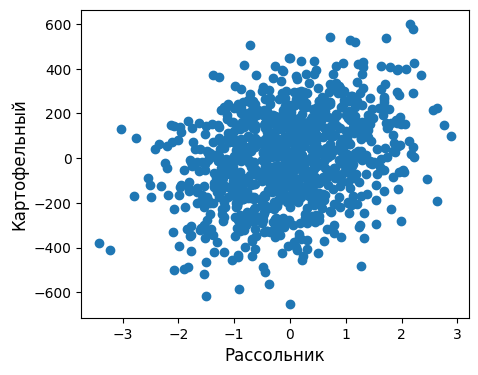

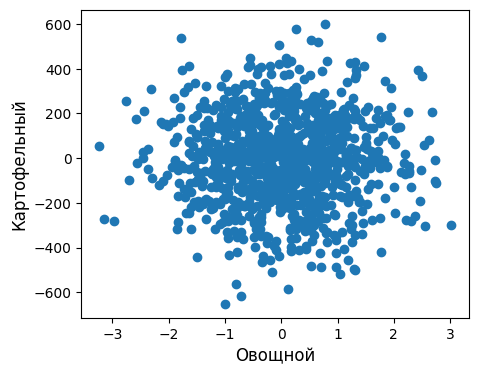

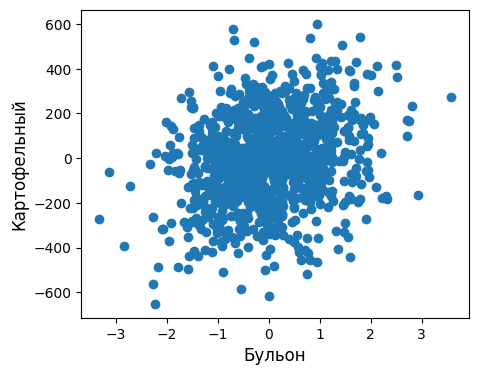

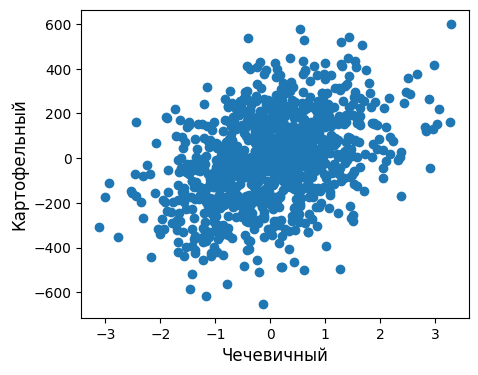

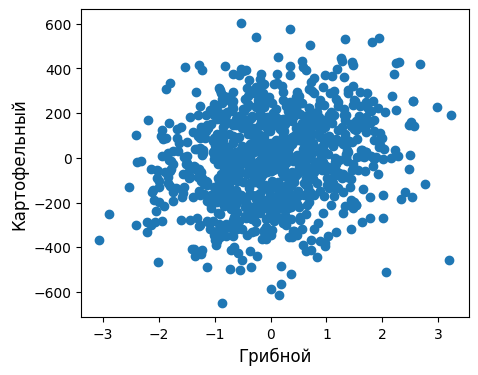

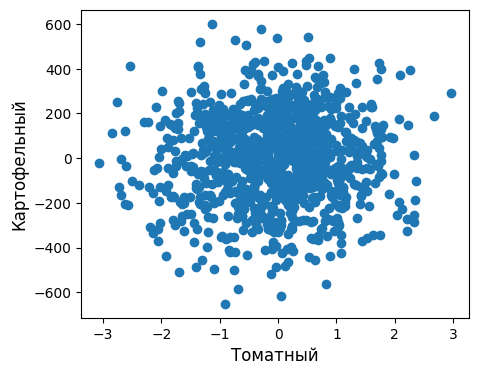

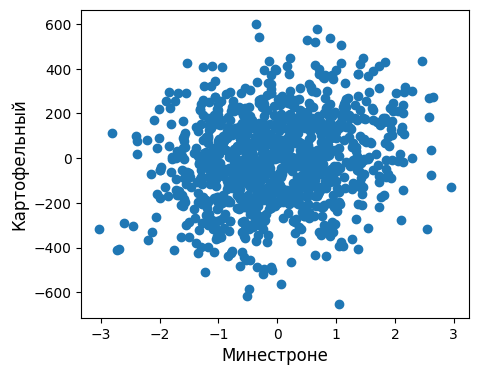

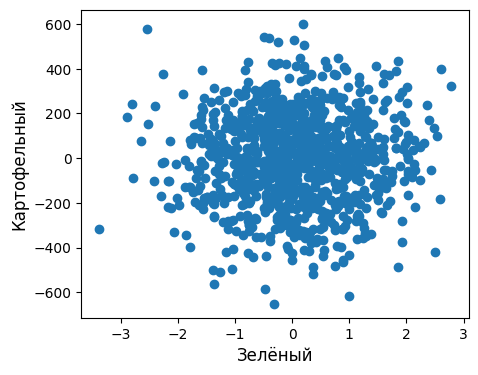

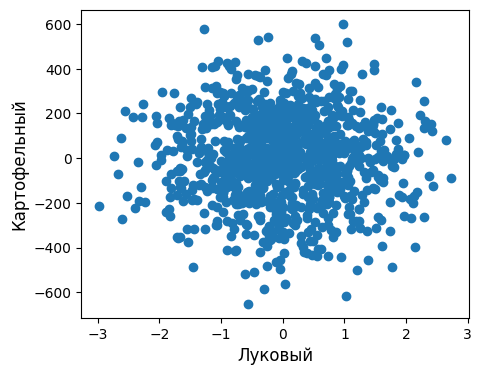

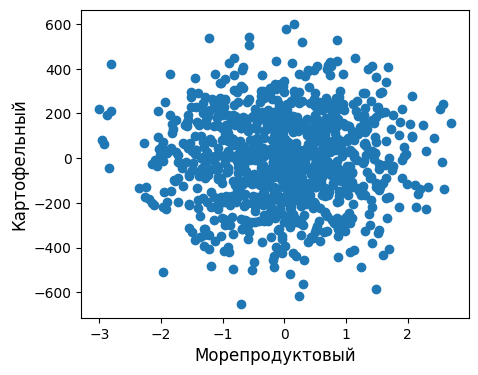

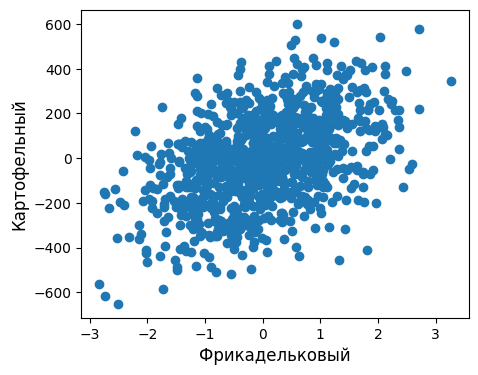

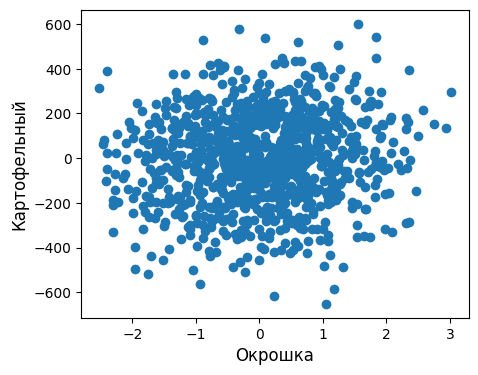

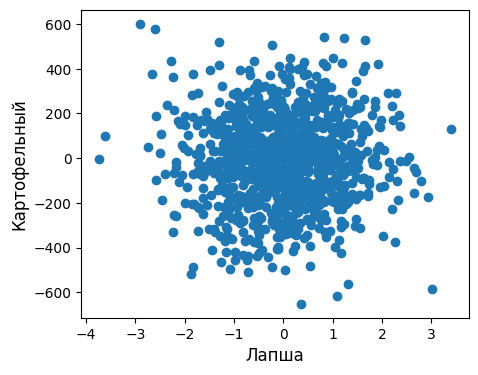

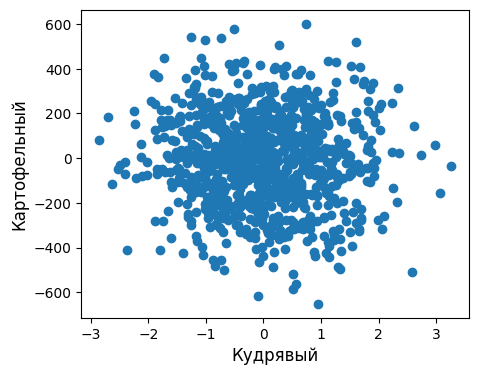

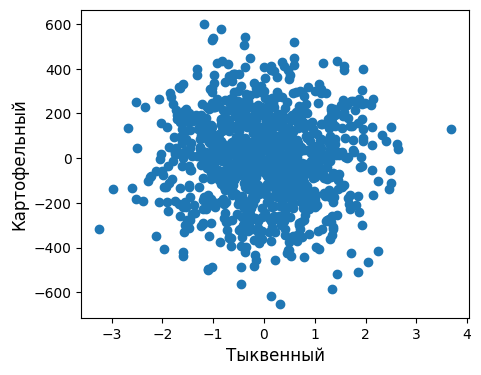

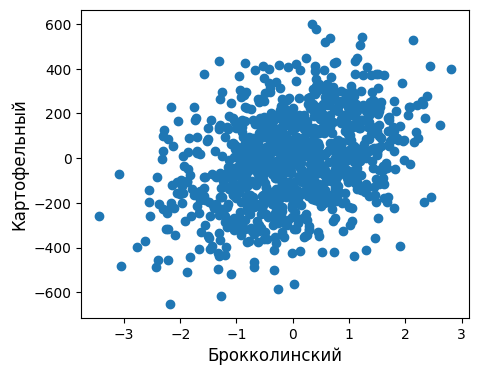

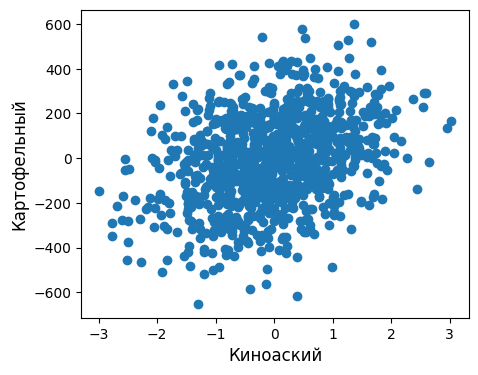

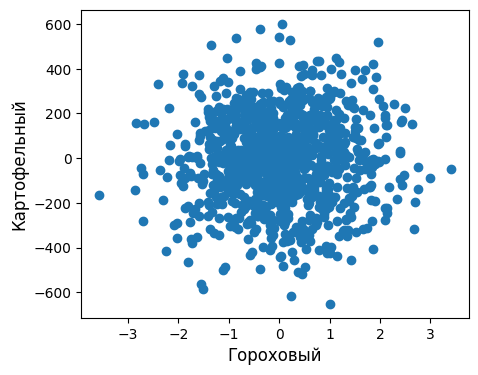

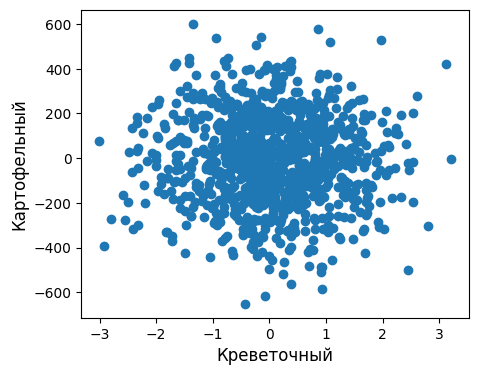

In [ ]:
for index, name in enumerate(df.columns[:20]):
    plt.figure(figsize=(5, 4))
    plt.scatter(df[name], df['Картофельный'])
    plt.ylabel('Картофельный', size=12)
    plt.xlabel(df.columns[index], size=12)
    plt.show()

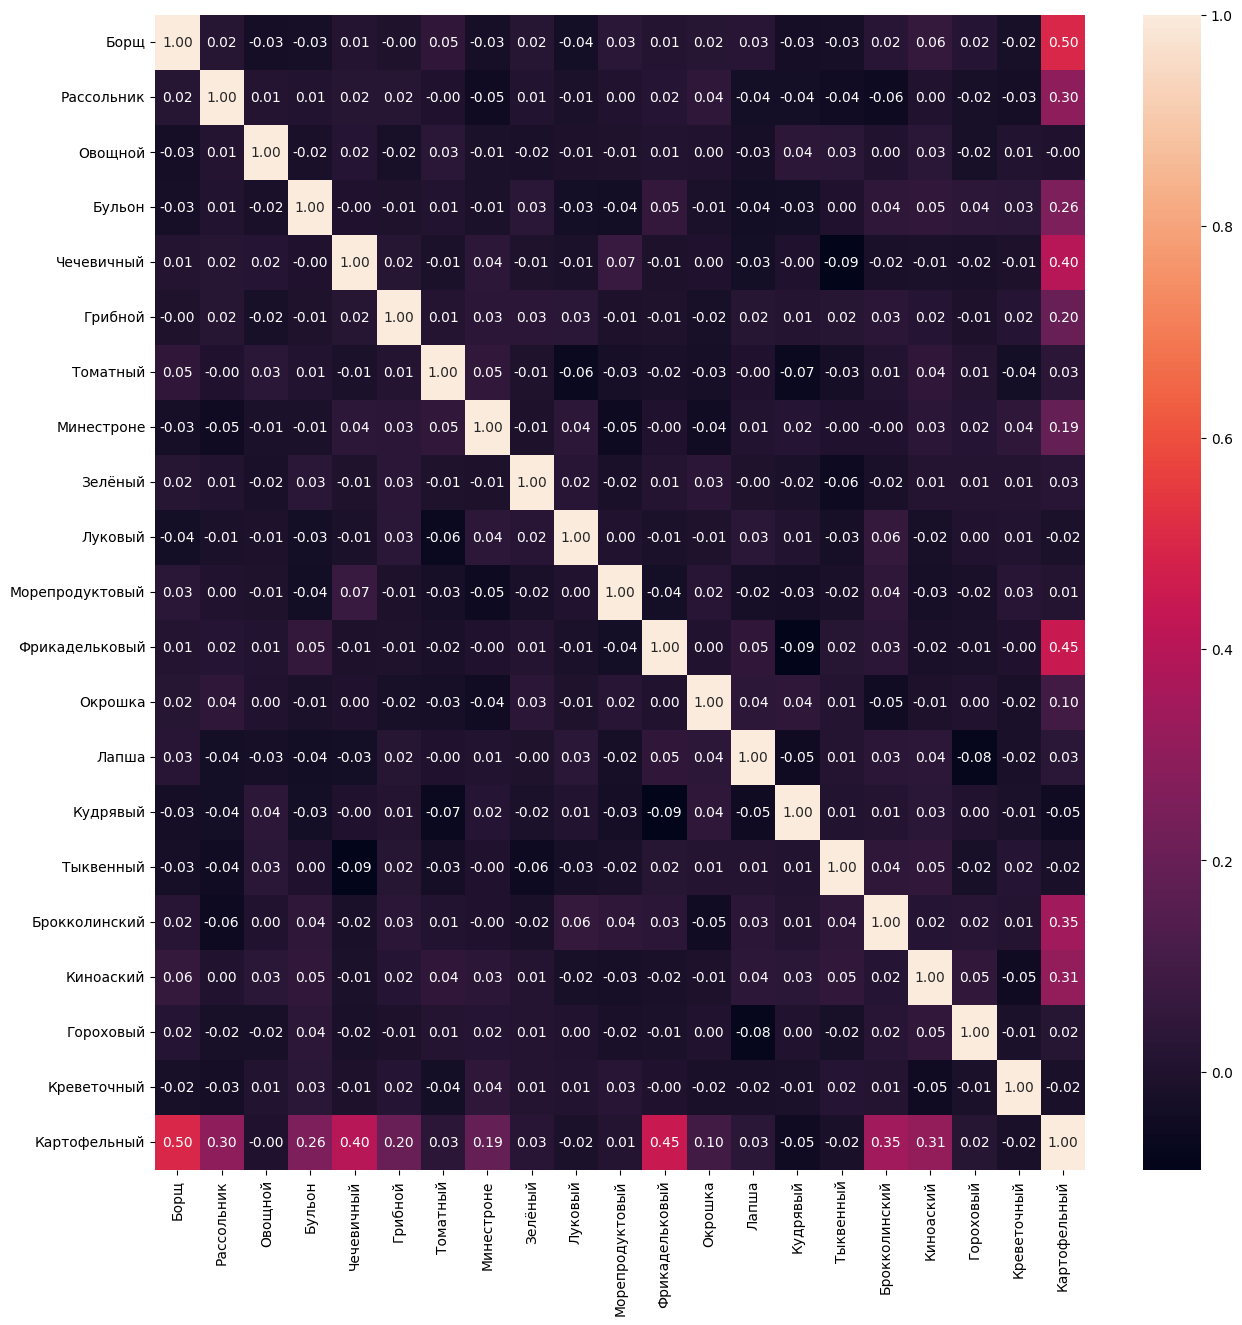

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), fmt='.2f', annot=True)
plt.show()

In [ ]:
X = df.drop(['Картофельный'], axis=1)
y = df['Картофельный']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

In [ ]:
scaler = MinMaxScaler(feature_range=(-1,1))
X = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X, columns=X_train.columns, index=X_train.index)
y_train_scaled = y_train
X_train_scaled.head()

,Борщ,Рассольник,Овощной,Бульон,Чечевичный,Грибной,Томатный,Минестроне,Зелёный,Луковый,Морепродуктовый,Фрикадельковый,Окрошка,Лапша,Кудрявый,Тыквенный,Брокколинский,Киноаский,Гороховый,Креветочный
677,-0.516276,0.092701,0.089404,0.050159,-0.322664,-0.072450,-0.276118,0.437499,0.464482,-0.025306,-0.173934,-0.748826,-0.218002,-0.171406,0.366307,-0.074487,-0.044983,-0.071116,-0.155356,0.391426
134,0.051378,-0.694435,-0.402347,0.034633,0.168385,0.037777,0.757410,0.296303,-0.095966,0.288153,-0.532716,0.355166,-0.118608,-0.047675,-0.183782,-0.040870,0.445920,-0.025695,0.286612,-0.097769
18,-0.181257,0.098028,-0.127488,-0.162874,-0.004391,0.127347,-0.488372,0.082659,0.260983,0.045584,-0.007991,0.244611,-0.464164,0.147122,0.083468,0.399546,-0.022125,0.588019,0.458838,-0.271233
703,-0.161868,-0.513790,0.271690,-0.035410,-0.410703,-0.252375,0.028265,0.528980,0.503965,0.571317,0.348137,-0.173877,0.058362,0.474122,0.134536,-0.096735,-0.138751,-0.238158,-0.004289,0.126693
628,-0.211424,-0.079686,0.400407,-0.060979,-0.182377,0.126135,0.015543,0.256905,0.004702,0.734973,-0.677920,-0.009453,-0.730091,-0.011057,0.407449,-0.522080,0.280649,0.503814,0.176485,-0.147355


In [ ]:
X = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X, columns=X_test.columns, index=X_test.index)
y_test_scaled = y_test
X_test_scaled.head()

,Борщ,Рассольник,Овощной,Бульон,Чечевичный,Грибной,Томатный,Минестроне,Зелёный,Луковый,Морепродуктовый,Фрикадельковый,Окрошка,Лапша,Кудрявый,Тыквенный,Брокколинский,Киноаский,Гороховый,Креветочный
825,0.952183,0.258984,0.095649,0.126283,-0.820169,0.187350,-0.400988,0.306604,-0.002796,-0.080326,0.022191,-0.101102,-0.650457,0.081513,-0.088664,0.200111,0.097352,0.326818,0.971959,-0.125035
374,0.486130,0.236358,0.164836,0.274262,-0.399638,-0.447802,0.857995,-0.763769,0.533913,0.315101,0.279448,-0.464097,-0.064357,0.068499,0.206072,0.512533,0.250970,-0.090555,-0.010987,0.223076
488,-0.076717,-0.015314,0.041404,-0.245821,-0.110488,-0.552981,0.386187,0.829702,0.684466,-0.175433,0.293629,-0.361008,0.174633,0.328801,-0.576273,0.248246,0.418103,-0.559018,-0.082832,-0.597204
608,0.041415,0.575802,0.338256,0.186667,0.132061,-0.120947,0.742410,-0.534566,-0.548243,-0.479338,-0.176295,-0.227523,-0.055715,-0.052354,0.300663,0.415246,0.033272,-0.090440,0.110300,-0.104532
42,0.194098,0.372228,-0.573237,0.504816,0.532184,-0.020549,0.363027,0.589573,0.631389,0.202739,-0.293199,-0.072983,0.290412,0.408232,-0.132461,-0.276678,-0.131452,-0.216647,-0.700861,-0.202334


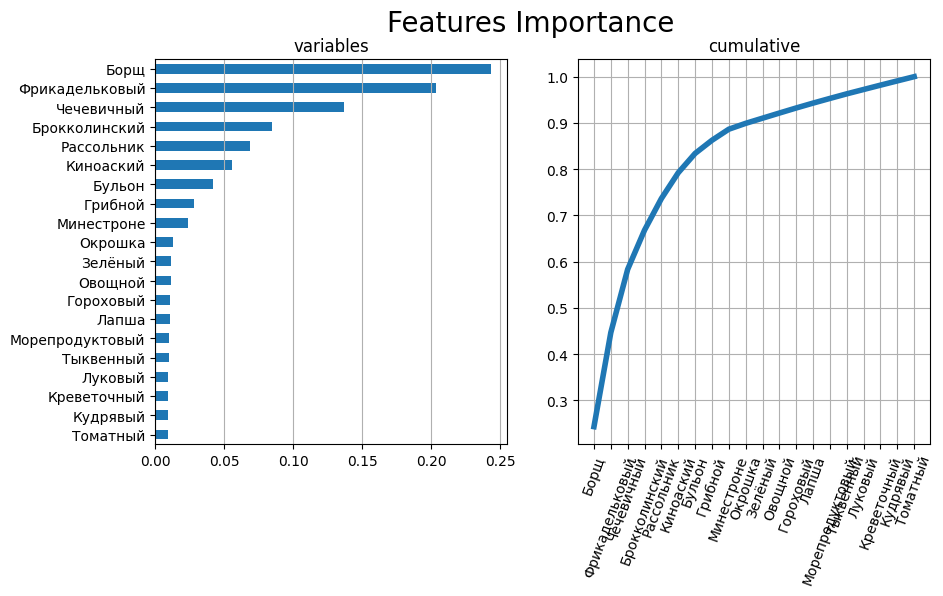

In [ ]:
feature_names = X_train_scaled.columns.tolist()
model = RandomForestRegressor(n_estimators=100,
                                        criterion="squared_error", random_state=0)
model.fit(X_train_scaled, y_train_scaled)
importances = model.feature_importances_
dtf_importances = pd.DataFrame({"IMPORTANCE":importances,
                                "VARIABLE":feature_names}).sort_values("IMPORTANCE",
                                                                       ascending=False)
dtf_importances['cumsum'] = dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")

fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False,figsize=(10,5),dpi=100)
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
    kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4,
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)),
          xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()

**Линейная регрессия**

In [ ]:
modelLR = LinearRegression()
modelLR.fit(X_train_scaled, y_train_scaled)
y_pr_LR = modelLR.predict(X_test_scaled)
_ = Reg_Models_Evaluation_Metrics(modelLR, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, y_pr_LR)

RMSE:  43.9627
  R2: 0.9511
 Adjusted R2: 0.9456
 Cross Validated R2: 1.0


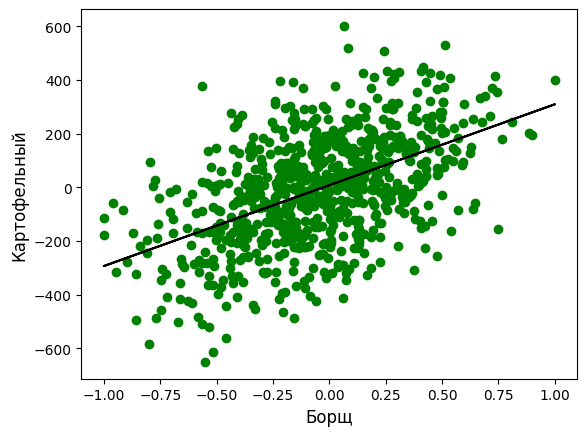

In [ ]:
X2 = X_train_scaled['Борщ'].values[:, np.newaxis]
y2 = y_train_scaled.values
model2 = LinearRegression()
model2.fit(X2, y2)
plt.scatter(X2, y2, color='g')
plt.plot(X2, model2.predict(X2), color='k')
plt.ylabel('Картофельный', size=12)
plt.xlabel('Борщ', size=12)
plt.show()

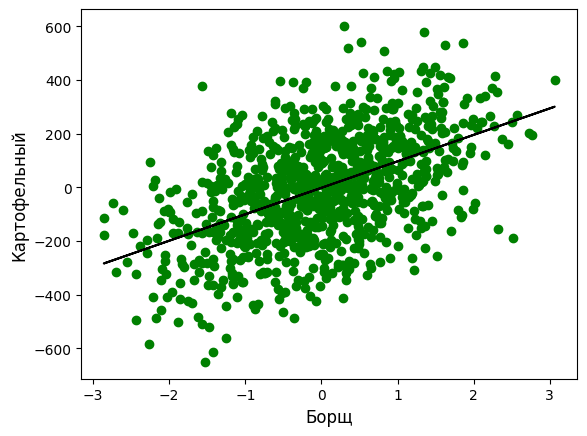

In [ ]:
X2 = df['Борщ'].values[:,np.newaxis]
y2 = df['Картофельный'].values
model2 = LinearRegression()
model2.fit(X2, y2)
plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2), color='k')
plt.ylabel('Картофельный', size=12)
plt.xlabel('Борщ', size=12)
plt.show()

**Полиноминальная регрессия**

In [ ]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(X)
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [ ]:
scaler = MinMaxScaler(feature_range=(-1,1))
X_p_train_scaled = scaler.fit_transform(X_p_train)
y_p_train_scaled = y_p_train
X_p_test_scaled = scaler.fit_transform(X_p_test)
y_p_test_scaled = y_p_test
X_p_train_scaled

array([[-0.19614245, -0.0414017 ,  0.45246297, ..., -0.13081189,
        -0.23642137, -0.09589752],
       [ 0.14654186, -0.47944579,  0.84896976, ...,  0.07609682,
        -0.75709416,  0.63258522],
       [ 0.42570915,  0.08084264,  0.41329885, ..., -0.12119969,
        -0.23725814, -0.09583315],
       ...,
       [ 0.25355977,  0.20786235,  0.82944926, ..., -0.19273159,
        -0.25635334, -0.0993555 ],
       [ 0.71405732,  0.05564136, -0.16348494, ..., -0.10466155,
        -0.22579949, -0.09337812],
       [-0.07197541, -0.35165077, -0.57583489, ..., -0.1275493 ,
        -0.2364023 , -0.09589272]])

In [ ]:
modelPR = LinearRegression(fit_intercept=False)
modelPR.fit(X_p_train_scaled, y_p_train_scaled)
y_pr_PR = modelPR.predict(X_p_test_scaled)
_ = Reg_Models_Evaluation_Metrics(modelPR, X_p_train_scaled, y_p_train_scaled, X_p_test_scaled, y_p_test_scaled, y_pr_PR)

RMSE:  70.2668
  R2: 0.8811
 Adjusted R2: 1.0242
 Cross Validated R2: 0.962


In [ ]:
X2 = X_p_train_scaled
y2 = y_p_train_scaled.values

poly_features = poly.fit_transform(X2)

model2 = LinearRegression()
model2.fit(poly_features, y2)


plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('Содержание супа', size=12)
plt.xlabel('Борщ', size=12)
plt.show()

In [ ]:
poly = PolynomialFeatures(degree=3, include_bias=False)

poly_features = poly.fit_transform(X)
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [ ]:
modelPR = LinearRegression()
modelPR.fit(X_p_train, y_p_train)
y_pr_PR = modelPR.predict(X_p_test)
_ = Reg_Models_Evaluation_Metrics(modelPR, X_p_train, y_p_train, X_p_test, y_p_test, y_pr_PR)

RMSE:  101.5225
  R2: 0.7517
 Adjusted R2: 1.0505
 Cross Validated R2: 0.8091


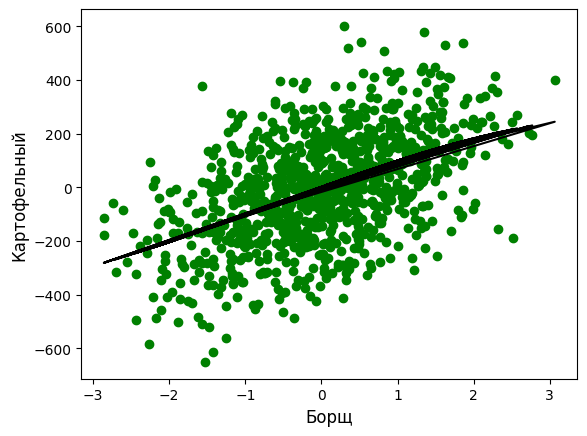

In [ ]:
X2 = df['Борщ'].values[:,np.newaxis]
y2 = df['Картофельный'].values

poly_features = poly.fit_transform(X2)

model2 = LinearRegression()
model2.fit(poly_features, y2)


plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('Картофельный', size=12)
plt.xlabel('Борщ', size=12)
plt.show()

**Регрессия дерева принятия решений**

In [ ]:
modelDT = DecisionTreeRegressor()
modelDT.fit(X_train_scaled, y_train_scaled)
y_dt_pred = modelDT.predict(X_test_scaled)
_ = Reg_Models_Evaluation_Metrics(modelDT, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, y_dt_pred)

RMSE:  177.2289
  R2: 0.2045
 Adjusted R2: 0.1156
 Cross Validated R2: 0.3161


In [ ]:
modelDT = DecisionTreeRegressor()
modelDT.fit(X_train, y_train)
y_dt_pred = modelDT.predict(X_test)
_ = Reg_Models_Evaluation_Metrics(modelDT, X_train, y_train, X_test, y_test, y_dt_pred)

RMSE:  153.5843
  R2: 0.4026
 Adjusted R2: 0.3359
 Cross Validated R2: 0.335


**Регрессия случайного леса**

In [ ]:
modelRF = RandomForestRegressor(n_estimators=100)
modelRF.fit(X_train_scaled, y_train_scaled)
y_rf_pred = modelRF.predict(X_test_scaled)
_ = Reg_Models_Evaluation_Metrics(modelRF, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, y_rf_pred)

RMSE:  110.2448
  R2: 0.6922
 Adjusted R2: 0.6578
 Cross Validated R2: 0.7457


In [ ]:
modelRF = RandomForestRegressor(n_estimators=100)
modelRF.fit(X_train, y_train)
y_rf_pred = modelRF.predict(X_test)
_ = Reg_Models_Evaluation_Metrics(modelRF, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  98.3799
  R2: 0.7549
 Adjusted R2: 0.7275
 Cross Validated R2: 0.7459


**Регрессия опорных векторов (SVR)**

**Linear SVR**

In [ ]:
modelSVR = SVR(kernel='linear')
modelSVR.fit(X_train_scaled, y_train_scaled)
y_svr_pred = modelSVR.predict(X_test_scaled)
_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, y_svr_pred)

RMSE:  119.0384
  R2: 0.6411
 Adjusted R2: 0.601
 Cross Validated R2: 0.5536


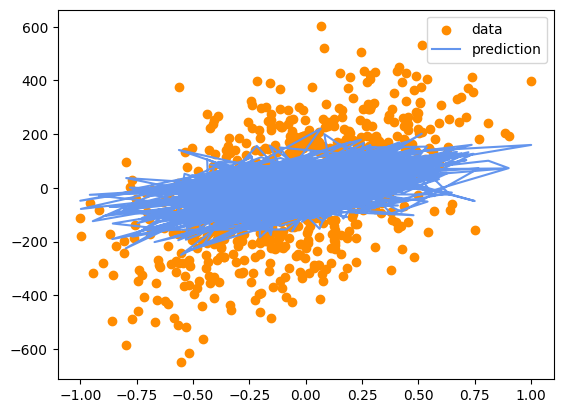

In [ ]:
plt.scatter(X_train_scaled["Борщ"], y_train_scaled, color='darkorange',
            label='data')
plt.plot(X_train_scaled["Борщ"], modelSVR.predict(X_train_scaled), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [ ]:
modelSVR = SVR(kernel='linear')
modelSVR.fit(X_train, y_train)
y_svr_pred = modelSVR.predict(X_test)
_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_svr_pred)

RMSE:  1.0812
  R2: 1.0
 Adjusted R2: 1.0
 Cross Validated R2: 1.0


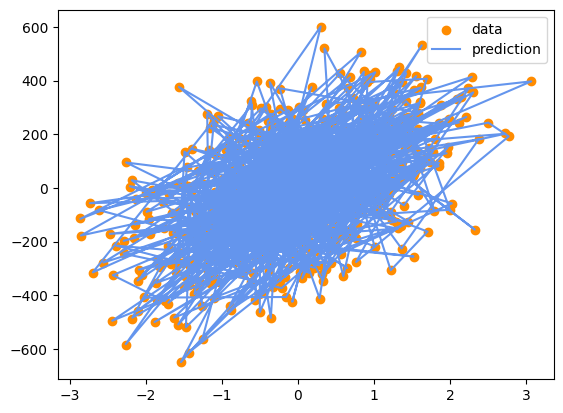

In [ ]:
plt.scatter(X_train["Борщ"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Борщ"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()



**Poly SVR**

In [ ]:
modelSVR = SVR(kernel='poly')
modelSVR.fit(X_train_scaled, y_train_scaled)
y_svr_pred = modelSVR.predict(X_test_scaled)
_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, y_svr_pred)

RMSE:  190.9894
  R2: 0.0762
 Adjusted R2: -0.027
 Cross Validated R2: 0.0415


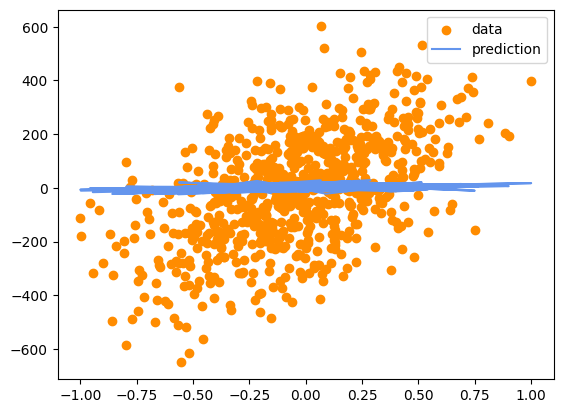

In [ ]:
plt.scatter(X_train_scaled["Борщ"], y_train_scaled, color='darkorange',
            label='data')
plt.plot(X_train_scaled["Борщ"], modelSVR.predict(X_train_scaled), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [ ]:
modelSVR = SVR(kernel='poly')
modelSVR.fit(X_train, y_train)
y_svr_pred = modelSVR.predict(X_test)
_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_svr_pred)

RMSE:  193.6507
  R2: 0.0503
 Adjusted R2: -0.0559
 Cross Validated R2: 0.0402


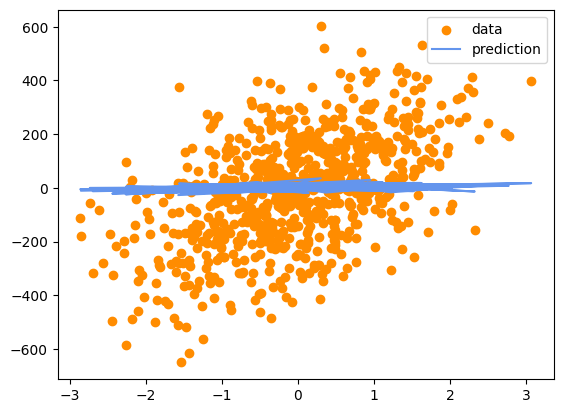

In [ ]:
plt.scatter(X_train["Борщ"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Борщ"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

**RBF SVR**

In [ ]:
modelSVR = SVR(kernel='rbf')
modelSVR.fit(X_train_scaled, y_train_scaled)
y_svr_pred = modelSVR.predict(X_test_scaled)
_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, y_svr_pred)

RMSE:  191.3196
  R2: 0.073
 Adjusted R2: -0.0306
 Cross Validated R2: 0.0824


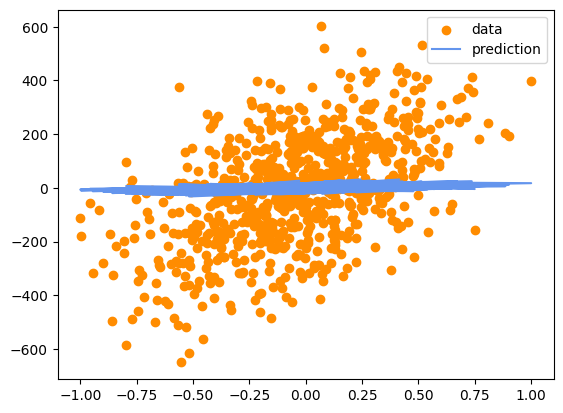

In [ ]:
plt.scatter(X_train_scaled["Борщ"], y_train_scaled, color='darkorange',
            label='data')
plt.plot(X_train_scaled["Борщ"], modelSVR.predict(X_train_scaled), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [ ]:
modelSVR = SVR(kernel='rbf')
modelSVR.fit(X_train, y_train)
y_svr_pred = modelSVR.predict(X_test)
_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_svr_pred)

RMSE:  189.6227
  R2: 0.0894
 Adjusted R2: -0.0124
 Cross Validated R2: 0.0772


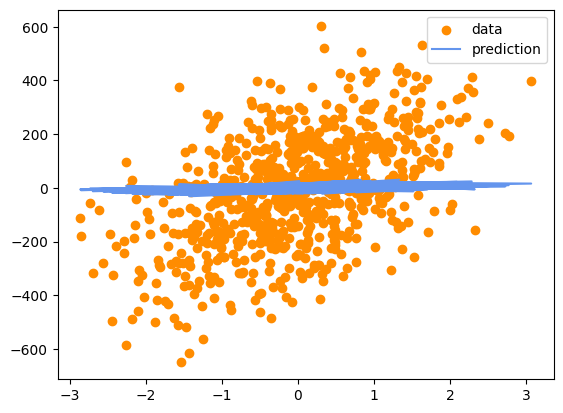

In [ ]:
plt.scatter(X_train["Борщ"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Борщ"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

**Регрессия ElasticNet**

In [ ]:
modelEN = ElasticNet(alpha=0.1, l1_ratio=0.8)
modelEN.fit(X_train_scaled, y_train_scaled)
y_en_pred = modelEN.predict(X_test_scaled)
_ = Reg_Models_Evaluation_Metrics(modelEN, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, y_en_pred)

RMSE:  38.0618
  R2: 0.9633
 Adjusted R2: 0.9592
 Cross Validated R2: 0.9768


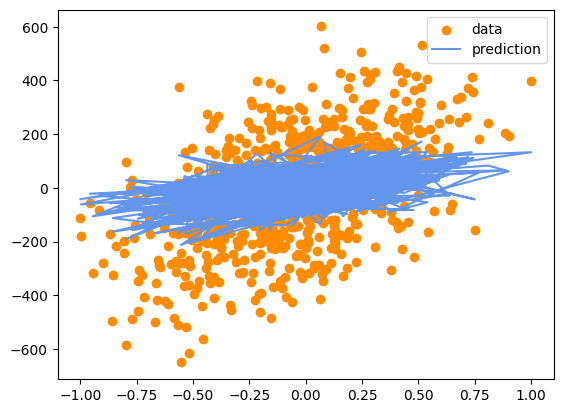

In [ ]:
plt.scatter(X_train_scaled["Борщ"], y_train_scaled, color='darkorange',
            label='data')
plt.plot(X_train_scaled["Борщ"], modelEN.predict(X_train_scaled), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [ ]:
modelEN = ElasticNet(alpha=0.1, l1_ratio=0.8)
modelEN.fit(X_train, y_train)
y_en_pred = modelEN.predict(X_test)
_ = Reg_Models_Evaluation_Metrics(modelEN, X_train, y_train, X_test, y_test, y_en_pred)

RMSE:  4.0521
  R2: 0.9996
 Adjusted R2: 0.9995
 Cross Validated R2: 0.9996


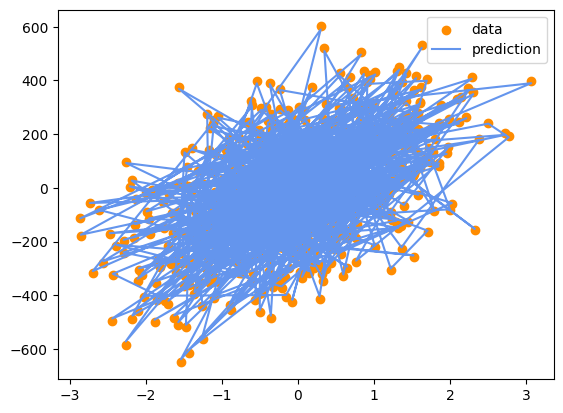

In [ ]:
plt.scatter(X_train["Борщ"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Борщ"], modelEN.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()